In [119]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_moons, make_circles, make_blobs # импортируем наши данные
import plotly.express as px

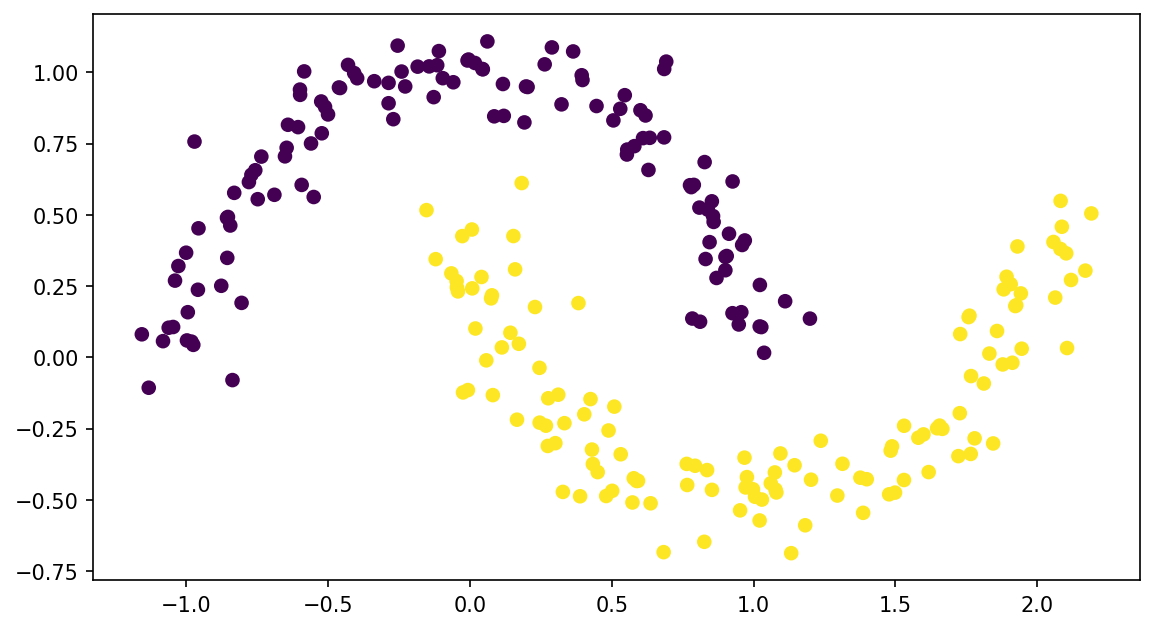

In [17]:
X_moons, Y_moons = make_moons(n_samples=250, noise=0.1)
fig=plt.figure(figsize=(9, 5), dpi= 150, facecolor='w', edgecolor='k')
plt.scatter(X_moons[:, 0], X_moons[:, 1],  c=Y_moons)

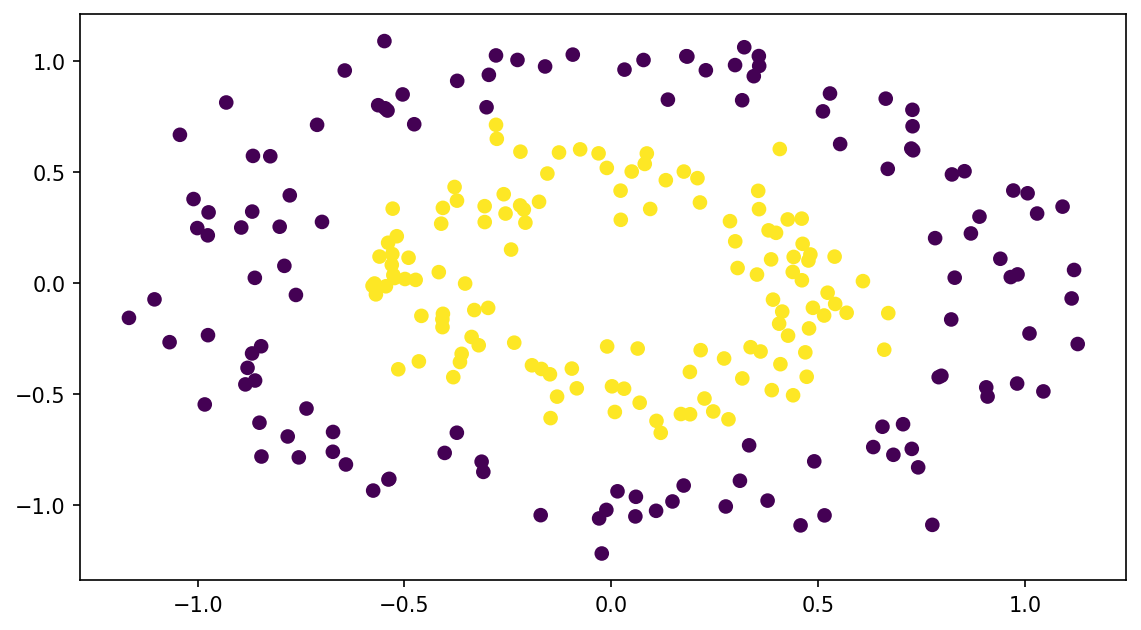

In [20]:
X_circles, Y_circles = make_circles(n_samples=250, noise=0.1, factor=0.5)
fig=plt.figure(figsize=(9, 5), dpi= 150, facecolor='w', edgecolor='k')
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=Y_circles)

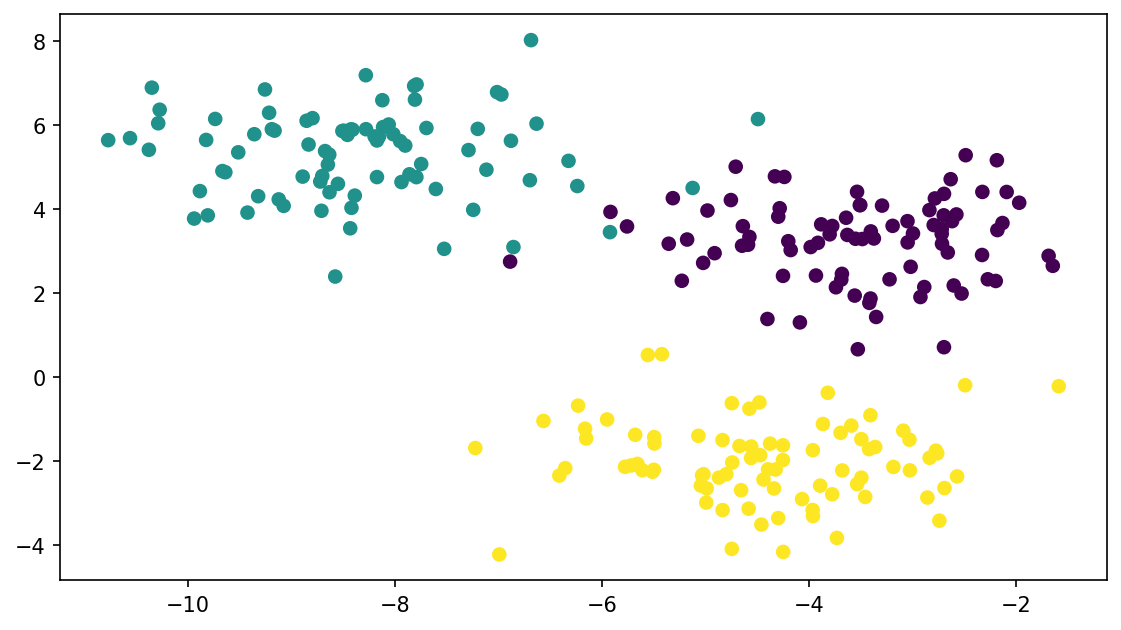

In [47]:
X_blobs, Y_blobs = make_blobs(n_samples=250, centers=3)
fig=plt.figure(figsize=(9, 5), dpi= 150, facecolor='w', edgecolor='k')
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=Y_blobs)

In [29]:
from sklearn.cluster import KMeans

https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

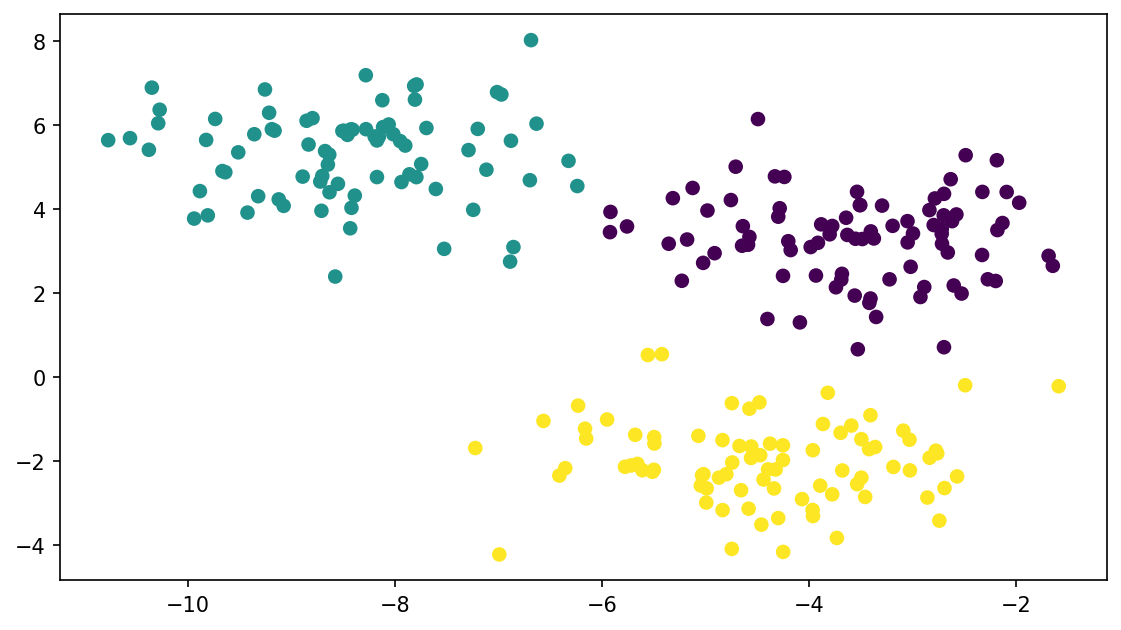

In [67]:
kmeans_blobs = KMeans(n_clusters=3, init = 'random')
output = kmeans_blobs.fit_predict(X_blobs)
fig=plt.figure(figsize=(9, 5), dpi= 150, facecolor='w', edgecolor='k')
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=output)

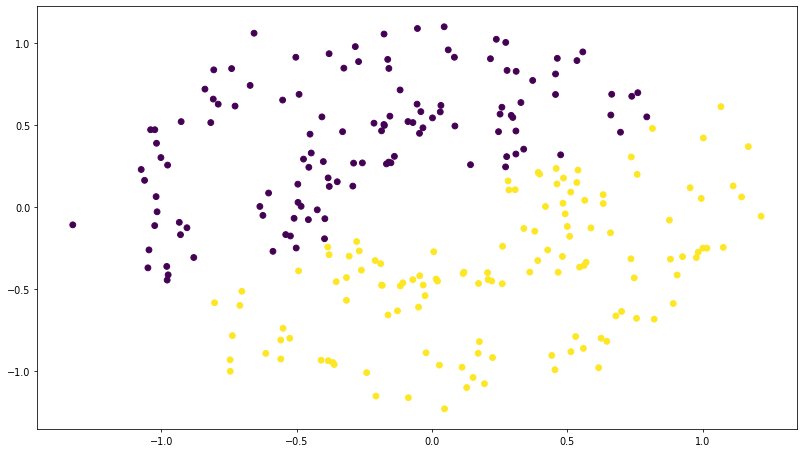

In [127]:
X_circles, Y_circles = make_circles(n_samples=250, noise=0.1, factor=0.5)
kmeans_circles = KMeans(n_clusters=2)
output = kmeans_circles.fit_predict(X_circles)
fig=plt.figure(figsize=(14, 8), dpi= 70, facecolor='w', edgecolor='k')
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=output)


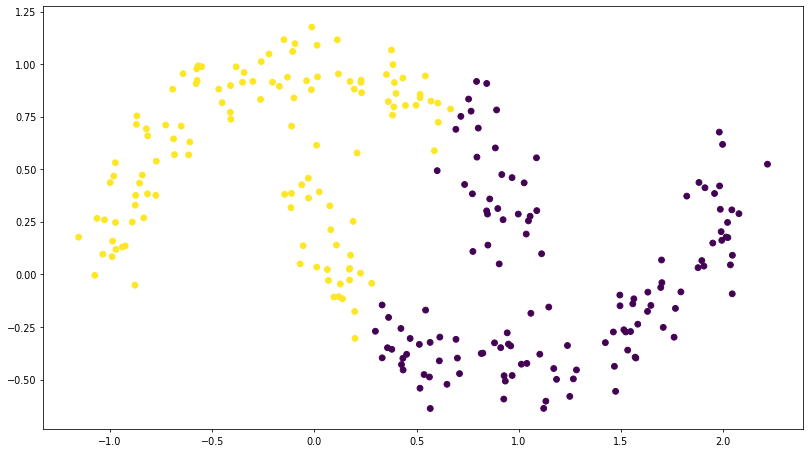

In [128]:
X_moons, Y_moons = make_moons(n_samples=250, noise=0.1)
kmeans_circles = KMeans(n_clusters=2)
output = kmeans_circles.fit_predict(X_moons)
fig=plt.figure(figsize=(14, 8), dpi= 70, facecolor='w', edgecolor='k')
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=output)

In [89]:
import plotly.express as px
iris = px.data.iris()
iris['size']= 5
fig = px.scatter_3d(iris, x='sepal_length', y='sepal_width', z='petal_width', size = 'size',
              color='species', size_max = 10)
fig.show()

In [90]:
import plotly.express as px
iris = px.data.iris()
iris['size']= 5
fig = px.scatter_3d(iris, x='sepal_length', y='sepal_width', z='petal_width', size = 'size',
               size_max = 10)
fig.show()

In [100]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id,size,claster
0,5.1,3.5,1.4,0.2,setosa,1,8,1
1,4.9,3.0,1.4,0.2,setosa,1,8,1
2,4.7,3.2,1.3,0.2,setosa,1,8,1
3,4.6,3.1,1.5,0.2,setosa,1,8,1
4,5.0,3.6,1.4,0.2,setosa,1,8,1


In [108]:
kmeans_blobs = KMeans(n_clusters=3, init = 'k-means++')
#kmeans_blobs = KMeans(n_clusters=3, init = 'random')
iris = px.data.iris()
output = kmeans_blobs.fit_predict(iris[['sepal_length','sepal_width','petal_length']])
iris['size']= 8
iris['claster']= output.astype(str)
fig = px.scatter_3d(iris, x='sepal_length', y='sepal_width', z='petal_width', size = 'size',
               size_max = 10, color = 'claster', symbol='species_id')
fig.show()

In [104]:
from sklearn.metrics import adjusted_rand_score, silhouette_score 
# импортируем библиотеки для оценки качества кластеризации

In [109]:
print("ARI:", adjusted_rand_score(iris['species_id'], iris['claster']))

ARI: 0.7155592175135396


In [110]:
# попробуем подобрать оптимальное число кластеров
import plotly.graph_objects as go
cnt_iter = 30 # сколько итераций будем делать
intertias = []
for k in range(1, cnt_iter):
    mns = KMeans(n_clusters=k)
    mns.fit(iris[['sepal_length','sepal_width','petal_length']])
    intertias.append(mns.inertia_)
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(1, cnt_iter)), y=intertias))
fig.show()  

In [111]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

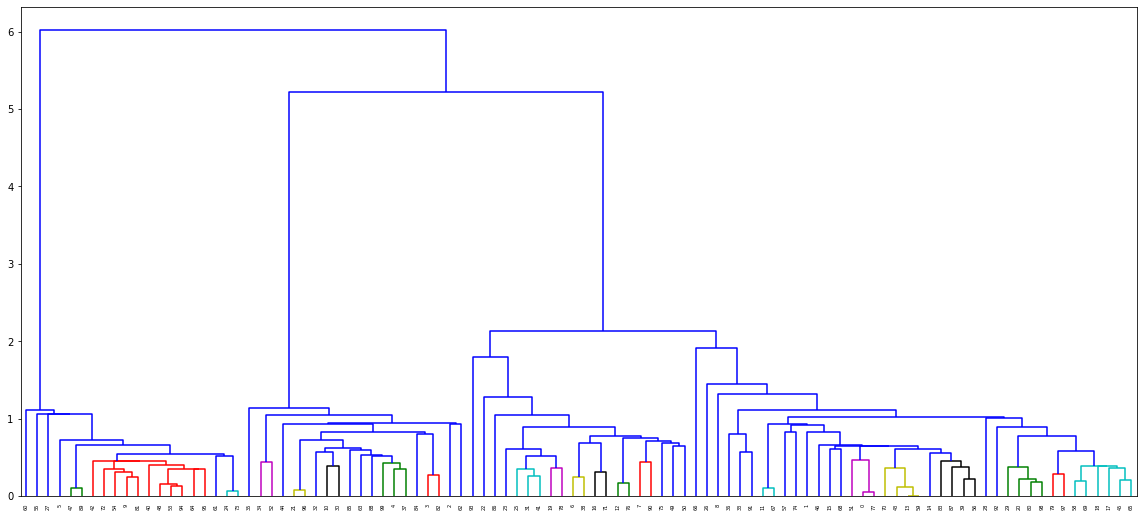

In [115]:
X_blobs, Y_blobs = make_blobs(n_samples=100, centers=5)
distance_mat = pdist(X_blobs) # pdist посчитает нам верхний треугольник матрицы попарных расстояний
Z = hierarchy.linkage(distance_mat, 'single') # linkage — реализация агломеративного алгоритма
plt.figure(figsize=(20, 9))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

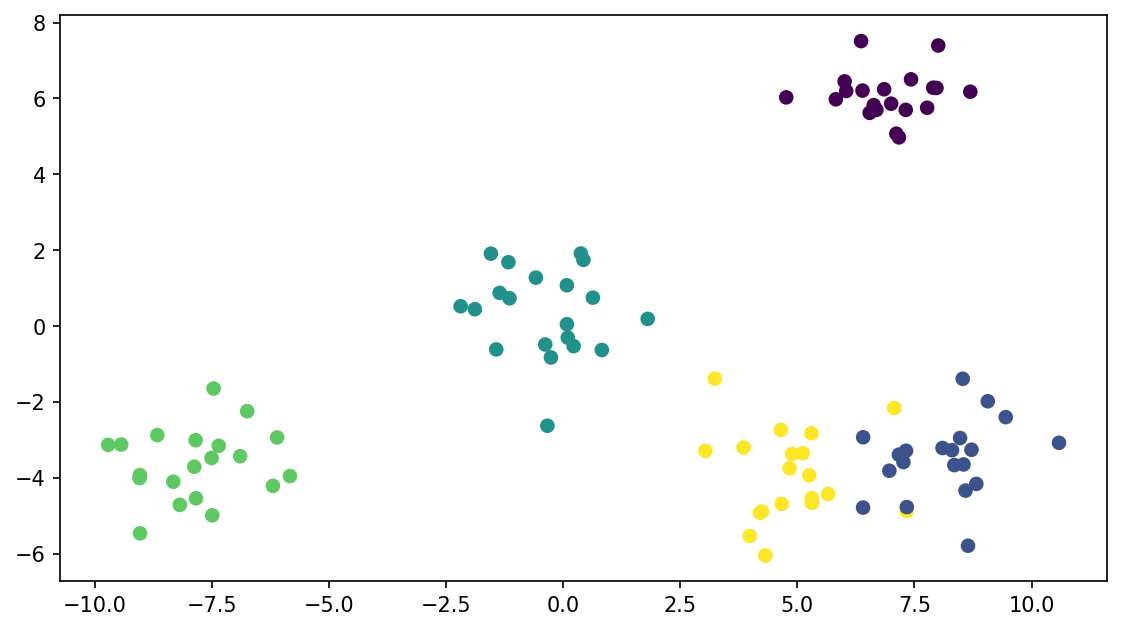

In [116]:
fig=plt.figure(figsize=(9, 5), dpi= 150, facecolor='w', edgecolor='k')
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=Y_blobs)

## Агломеративная кластеризация

In [129]:
from sklearn.cluster import AgglomerativeClustering

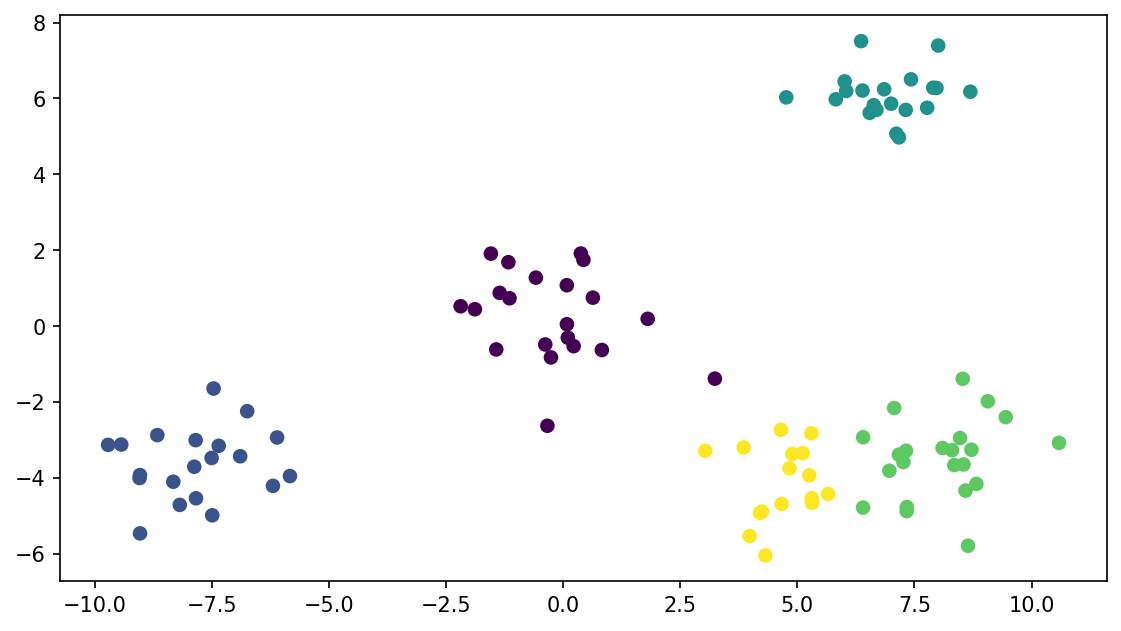

In [132]:
aglo_blobs = AgglomerativeClustering(n_clusters=5)
output = aglo_blobs.fit_predict(X_blobs)
fig=plt.figure(figsize=(9, 5), dpi= 150, facecolor='w', edgecolor='k')
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=output)

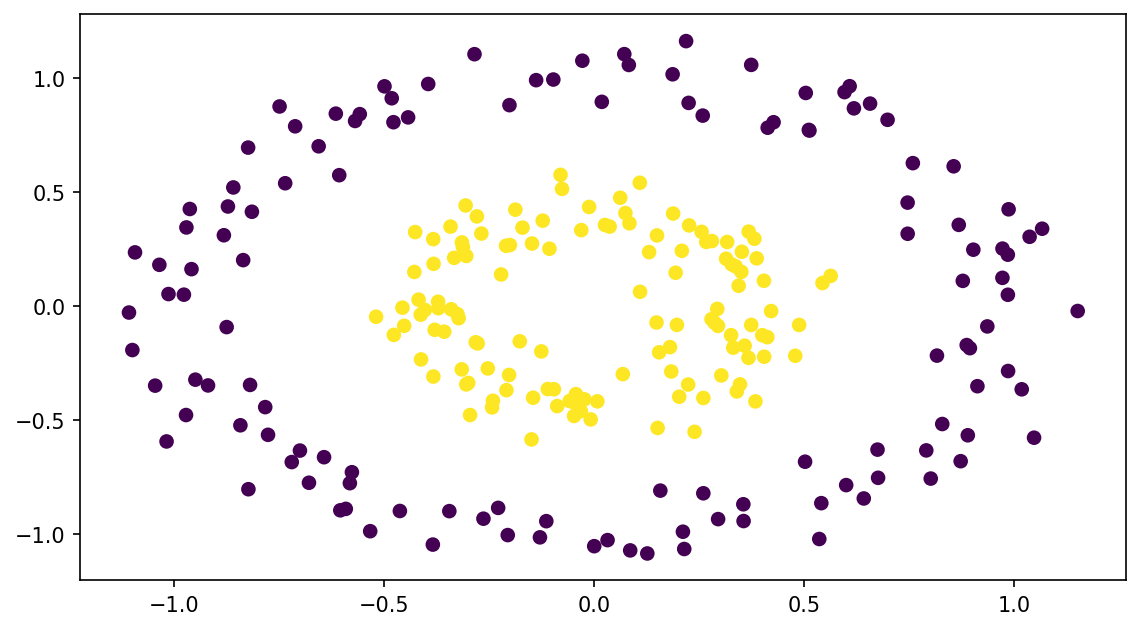

In [149]:
X_circles, Y_circles = make_circles(n_samples=250, noise=0.09, factor=0.4)

aglo_circles = AgglomerativeClustering(n_clusters=2, linkage='single', affinity="manhattan")
output = aglo_circles.fit_predict(X_circles)
fig=plt.figure(figsize=(9, 5), dpi= 150, facecolor='w', edgecolor='k')
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=output)

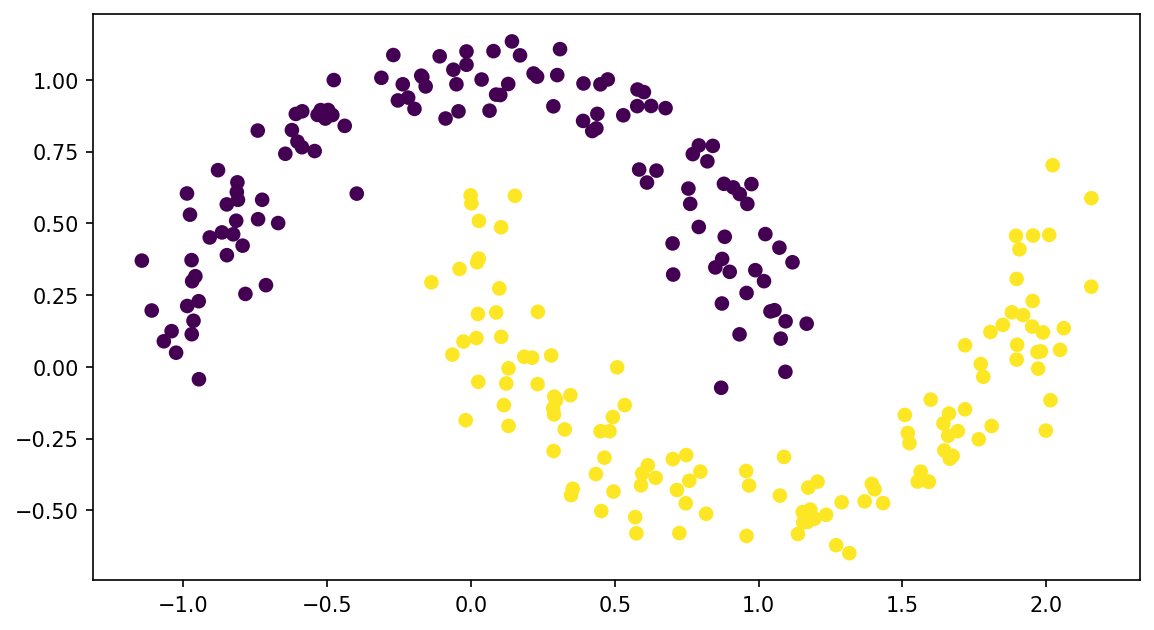

In [154]:
X_moons, Y_moons = make_moons(n_samples=250, noise=0.1)
aglo_circles = AgglomerativeClustering(n_clusters=2, linkage='single', affinity="manhattan")
output = aglo_circles.fit_predict(X_moons)
fig=plt.figure(figsize=(9, 5), dpi= 150, facecolor='w', edgecolor='k')
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=output)

## DBSCAN

In [155]:
from sklearn.cluster import DBSCAN

https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

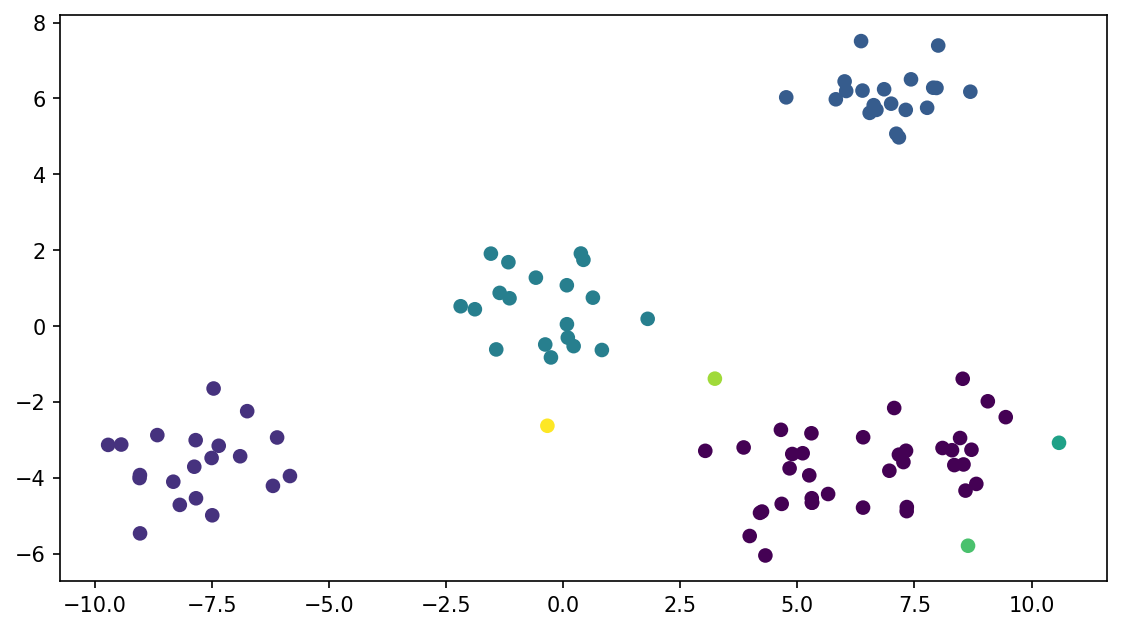

In [171]:
dbscan_blobs = DBSCAN(eps=1.3, min_samples=1)
output = dbscan_blobs.fit_predict(X_blobs)
fig=plt.figure(figsize=(9, 5), dpi= 150, facecolor='w', edgecolor='k')
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=output)

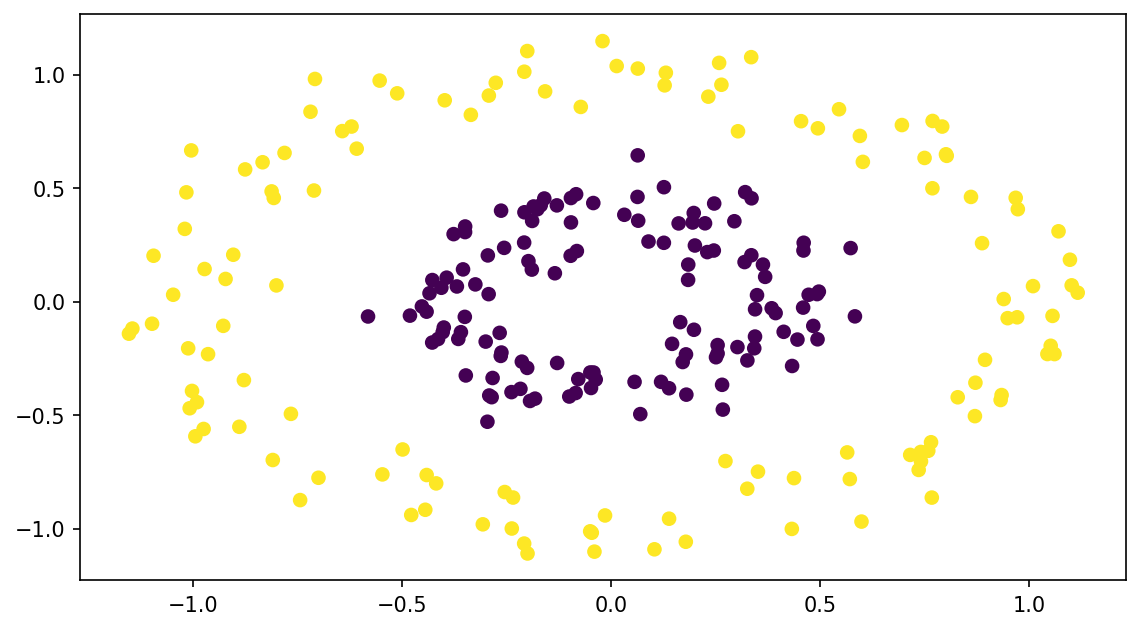

In [183]:
X_circles, Y_circles = make_circles(n_samples=250, noise=0.09, factor=0.4)

dbscan_blobs = DBSCAN(eps=0.196, min_samples=1)
output = dbscan_blobs.fit_predict(X_circles)
fig=plt.figure(figsize=(9, 5), dpi= 150, facecolor='w', edgecolor='k')
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=output)

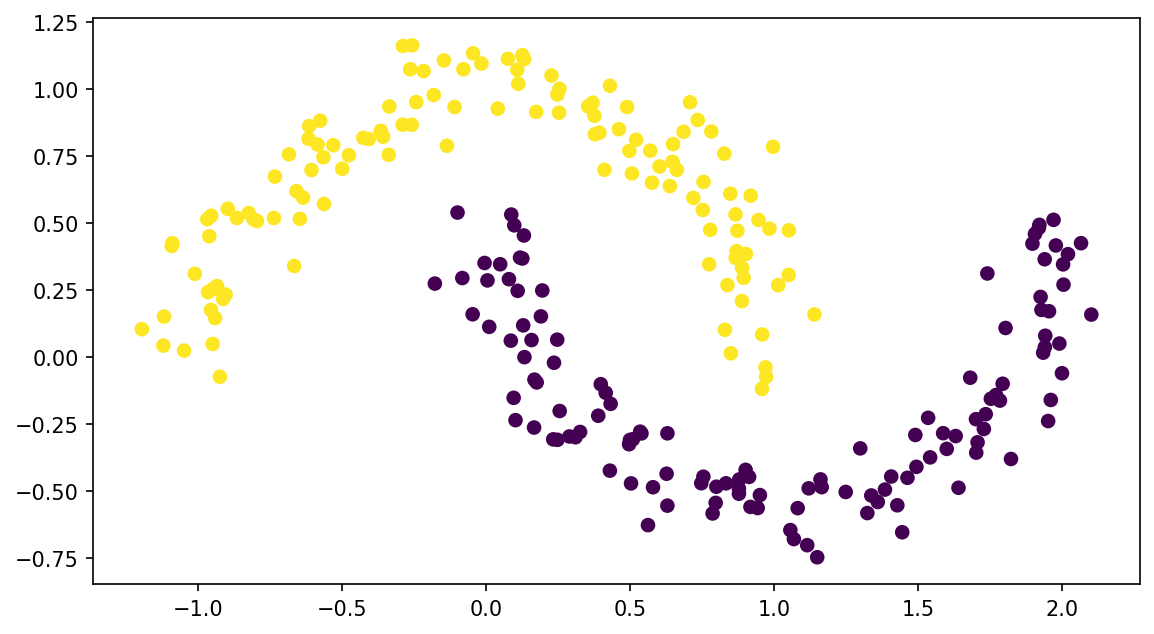

In [178]:
X_moons, Y_moons = make_moons(n_samples=250, noise=0.1)
dbscan_blobs = DBSCAN(eps=0.2, min_samples=1)
output = dbscan_blobs.fit_predict(X_moons)
fig=plt.figure(figsize=(9, 5), dpi= 150, facecolor='w', edgecolor='k')
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=output)